<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Import libraries, obtain DF and descriptive analysis.
# (Importar las librerias, obtener los DF y Analisis descriptivo)

In [2]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

df_games_raw = pd.read_csv('/datasets/games.csv')
#df_games_raw

Matplotlib is building the font cache; this may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: '/datasets/games.csv'

In [3]:
df_games_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Year_of_release es float cuando puede ser datetime o int
- User_Score es un object cuando puede ser un int

In [4]:
df_games_raw.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Aqui se puede saber el año del juego mas antiguo y del juego mas reciente. Tambien se puede ver lo maximo recaudado por un juego en cada region, pero mas adelante se analizara este punto, si llega a ser pertinente.

In [5]:
df_games_raw.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Se evidencia que en la columna 'Name' y 'Genre' hacen falta dos datos. La columna que mas datos le hace falta es la columna de 'Critic_Score', la cual tiene 8 578 datos ausentes, le sigue Rating, User_score y por ultimo Year_of_release

In [6]:
df_games_raw.duplicated().sum()

0

Exsisten 0 filas completamente duplicadas

In [7]:
df_games_raw.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

# Reemplazar los nombres de las columnas, ponerlos todos en minuscula:

In [8]:
new_col_names = []
for word in df_games_raw.columns: # con un for para automatizar la tarea
    new_name = word.lower()
    new_col_names.append(new_name)
df_games_raw.columns= new_col_names
print(df_games_raw.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [9]:
# Un codigo mas facil:
df_games_raw.columns = df_games_raw.columns.str.lower() #usa menos recursos y es mas rapido
print(df_games_raw.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


# *Convertir los tipos de datos en los que son necesarios*


## Primero rellenar los ausentes

In [10]:
df_games_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
nan_name = df_games_raw.query('name.isna()==True')
nan_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
nan_na = nan_name['na_sales']/df_games_raw['na_sales'].sum() *100
nan_eu = nan_name['eu_sales']/df_games_raw['eu_sales'].sum() *100
print(nan_na)
nan_eu

659      0.040433
14244    0.000000
Name: na_sales, dtype: float64


659      0.021859
14244    0.000000
Name: eu_sales, dtype: float64

In [13]:
ptj = len(nan_name) /len(df_games_raw)*100 
ptj

0.011965300628178284

Los dos juegos que se desconoce el nombre y se desconoce el genero no aportan casi nada a las ganancias de la empresa en estados unidos y europa. El primero aporta 0,04% y el segundo no aporta nada en las ganancias de estados unidos, y en europa no cambia mucho, el primer juego aporta 0,02% y el segundo no aporta nada.

Tambien vemos como estas dos lineas son apenas el 0.01% de todo el dataframe.

En vista de que la informacion tiene un aporte minimo, se pueden aliminar estas dos filas sin afectar en gran medida el analisis.

In [14]:
df_games_raw_1 = df_games_raw.dropna(subset=['name'])
df_games_raw_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [15]:
#En caso de que hubiera que eliminar NANs:
#print(df_games_raw['name'].isna().sum())
#df_games_raw['name'] = df_games_raw['name'].fillna(value = 'Name unknown') # para eliminar los valores ausentes

In [16]:
# Para rectificar que no hay NaNs
#df_games_raw['name'].isna().sum() # esos valores ausentes ahora son 'Unknown'

In [17]:
#En caso de que hubiera que eliminar NANs:
#df_games_raw['genre'] = df_games_raw['genre'].fillna(value= 'Genre unknown')

In [18]:
#Para rectificar que no hay NaNs:
#df_games_raw['genre'].isna().sum()

Con respecto al rating se podria ponerle una calificacion generica o una que le de acceso atodo el publico, pero hay consecuentas muy negativas con respecto al analisis, pues podria sesgar las conclusiones hacia esa calificacion. Por otro lado al ponerle una generica podriamos terminar combinando juegos que solo son para mayores de 17 con juegos que son para niños o para todo el `publico. lo cual no es buena idea. Preferible dejarlo en blanco o cambiar el valor por un 'Rating unknown'

In [19]:
#Eliminando NaNs de el df que ya no tiene los dos juegos sin nombre: 
df_games_raw_1.loc[:,'rating'] = df_games_raw_1['rating'].fillna(value = 'Rating unknown')

/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [20]:
df_games_raw_1['rating'].isna().sum()

0

In [21]:
#df_games_raw_1.sample(23)

Elimine dos columnas de el DF, luego cambie los NaNs de la columna rating por 'Rating unknown' para su manejo con ayor facilidad.

 ## Duplicados

In [22]:
df_games_raw_1.duplicated().sum()

0

In [23]:
df_games_raw_1[['name','platform']].duplicated().sum()

4

In [24]:
hidden_duplicates = df_games_raw_1[df_games_raw_1[['name','platform']].duplicated(keep='first')]
hidden_duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [25]:
df_games_clean = df_games_raw_1.drop_duplicates(subset=['name','platform'], keep='first')
print(f"Filas originales: {len(df_games_raw_1)}")
print(f"Filas después de eliminar duplicados: {len(df_games_clean)}")

Filas originales: 16713
Filas después de eliminar duplicados: 16709


En principio el codigo decia que no habia duplicados, y en parte es verdad, sin embargo si existian duplicados engañosos, solo eran 5, pero repetian casi la misma informacion. Entonces los elimine para tener un mejor analisis.

In [26]:
df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       10010 non-null  object 
 10  rating           16709 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Los terminos 'TBD' no brindan información cuantificable en este momento. Lo que significa que no sirven para el analisis.

Podria haber una posibilidad de realizar un codigo para que se pueda añadir esa informacion y que cambie los resultados a medida que se van ingresando esos datos que faltan por determinar.
Por el momento tomo la decicion de convertir los TBD en NaN, cambiarlos a valor cero y posteriormente, hacer los calculos necesarios. 

El que no haya informacion puede indicar unas cuantas cosas: 
 - a) Posible perdida de datos, ahi la mejor opcion es realizar una trazabilidad para averigur el porque
 - b) Los usuarios no vieron relevante el darle una calificación a el juego
 - c) Los profesionales que critican el juego no vieron relevante darle una calificacion a el juego (poco probable porque la empresa creadora del juego perderia dinero)
 - d) No se pudo obtener los datos de los criticos y de los usuarios.

In [27]:
mask = df_games_clean['user_score'] == 'tbd'
df_games_clean.loc[mask, 'user_score'] = pd.NA
df_games_clean

/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Rating unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Rating unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Rating unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Rating unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Rating unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Rating unknown


In [28]:
df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       7586 non-null   object 
 10  rating           16709 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [29]:
df_games_clean.loc[:,'user_score'] = pd.to_numeric(df_games_clean['user_score'])

/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [30]:


df_games_clean['user_score'] = pd.to_numeric(df_games_clean['user_score'])
df_games_clean.loc[:,'user_score'] = df_games_clean['user_score'].fillna(value =0)

df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       16709 non-null  float64
 10  rating           16709 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


/tmp/ipykernel_32/232558487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_clean['user_score'] = pd.to_numeric(df_games_clean['user_score'])


En muchos casos es mejor dejar los valores como NaN, ya que si se le añade un numero cambiara los calculos que se haga sobre esa columna, si se le cambia por cero, cambiara el resultado.Sin embargo en este caso seria mejor dejarlos como cero, para que los calculos de mas adelante se puedan realizar sin problemas. 

In [31]:
df_games_clean.isna().sum()
df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       16709 non-null  float64
 10  rating           16709 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [32]:
#En caso de necesitar cambiar los NaN por otro valor:

df_games_clean.loc[:,'critic_score'] = df_games_clean['critic_score'].fillna(value = 0)
df_games_clean.isna().sum()

name                 0
platform             0
year_of_release    268
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

En muchos casos es mejor dejar los valores como NaN, ya que si se le añade un numero cambiara los calculos que se haga sobre esa columna, si se le cambia por cero, cambiara el resultado.Sin embargo en este caso seria mejor dejarlos como cero, para que los calculos de mas adelante se puedan realizar sin problemas. 

Tenemos el nombre, tenemos la plataforma pero no tenemos el año de lanzamiento del juego, lo cual nos deja con la mitad de la información, porque pueden haber publicaciones de un mismo juego pero con años diferentes, por ejemplo: FIFA 15, publicado en el años 2015 y luego FIFA 16, publicado en el año 2016, Por ello esta informacion no tiene relevancia en el analisis, y tambien puede causar confusiones al momento de realizar analisis.
La decición fue eliminar las filas con los datos ausentes en 'year_of_release'.

In [33]:
df_games_limpios = df_games_clean.query('year_of_release.isna() == False')
df_games_limpios

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Rating unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Rating unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,Rating unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,Rating unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,Rating unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,Rating unknown


In [34]:
df_games_limpios.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [35]:
#df_games_clean['year_of_release'] = pd.to_numeric(df_games_clean['year_of_release'],errors='coerce')
df_games_limpios.loc[:,'year_of_release'] = df_games_limpios['year_of_release'].astype(int) # Ya es un int pero aun tiene valores ausentes
df_games_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     16441 non-null  float64
 9   user_score       16441 non-null  float64
 10  rating           16441 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [36]:
df_games_limpios

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Rating unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Rating unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,Rating unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,Rating unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,Rating unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,Rating unknown


En principio el codigo decia que no habia duplicados, y en parte es verdad, sin embargo si existian duplicados engañosos, solo eran 5, pero repetian casi la misma informacion. Entonces los elimine para tener un mejor analisis. 

In [37]:
#def calculate_revenue (fila):
df_games_limpios.loc[:,'revenue'] = df_games_limpios['na_sales']+df_games_limpios['eu_sales']+df_games_limpios['jp_sales']+df_games_limpios['other_sales']
df_games_limpios

/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Rating unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Rating unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,Rating unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,Rating unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,Rating unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,Rating unknown,0.01


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


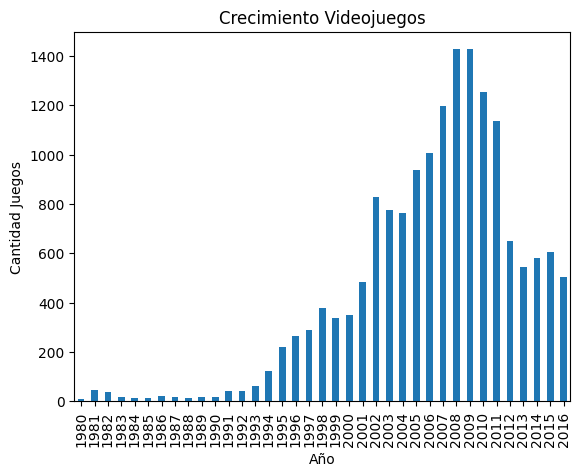

In [39]:
año_lanzamiento = df_games_limpios.groupby('year_of_release')['name'].count().reset_index()
año_lanzamiento.plot(x='year_of_release', kind='bar',legend= False)
plt.title('Crecimiento Videojuegos')
plt.xlabel('Año')
plt.ylabel('Cantidad Juegos')
plt.show()

Los dos años con mayor lanzamientos de juegos sin importar la categoria, plataforma o rating, segun los datos brindados, fueron los años 2008 y 2009

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos con un incremento constante en años anteriores que ha empezado a ir en declive en los últimos años
</div>


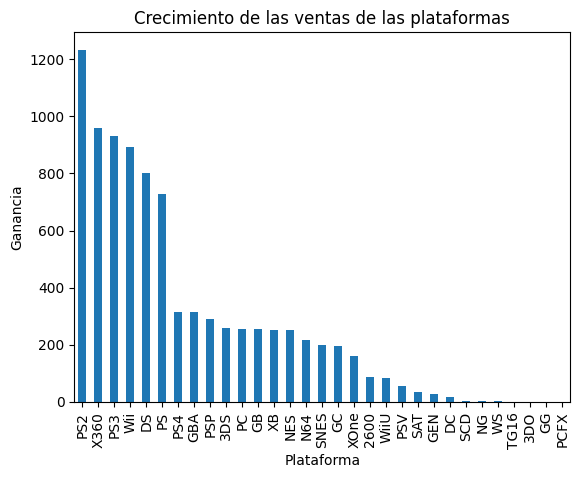

In [40]:
plataforma = df_games_limpios.groupby('platform')['revenue'].sum().sort_values(ascending=False).reset_index()
plataforma.plot(x='platform',kind='bar',legend=False)
plt.title('Crecimiento de las ventas de las plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ganancia')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Se muestran los datos de una manera clara, se puede ver una clara diferencia entre las primeras posiciones contra el resto de plataformas
</div>


La 6 plataformas con mayores ventas han sido: 
- PS2
- X360
- PS3
- WII
- DS
- PS

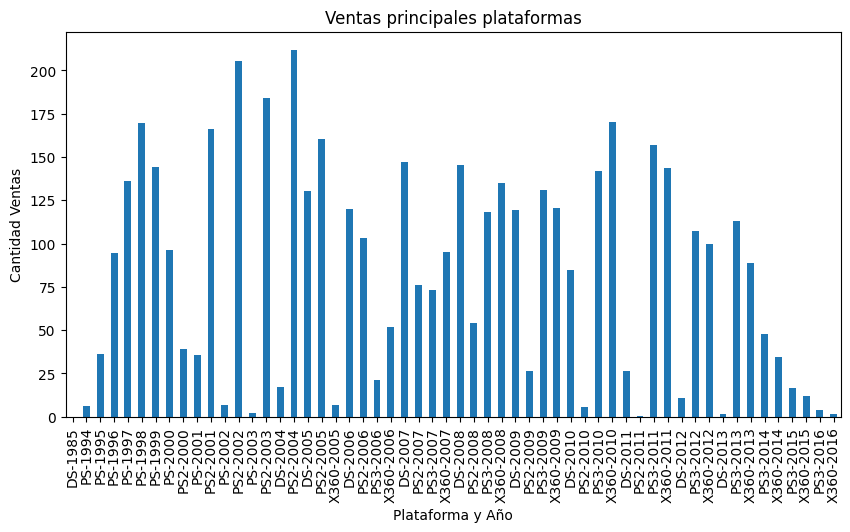

In [41]:
mayores_ventas = df_games_limpios.query("platform == ['PS2','X360','PS3','WII','DS','PS']")
top_5 = mayores_ventas.groupby(['year_of_release','platform'])['revenue'].sum().reset_index()
top_5['plat_año'] = top_5['platform']+'-'+ ((top_5['year_of_release']).astype(str))
top_5.plot(x='plat_año',y='revenue', kind='bar',legend=False,figsize=(10,5),xlabel='Plataforma y Año')
plt.title('Ventas principales plataformas')
plt.ylabel('Cantidad Ventas')
plt.show()

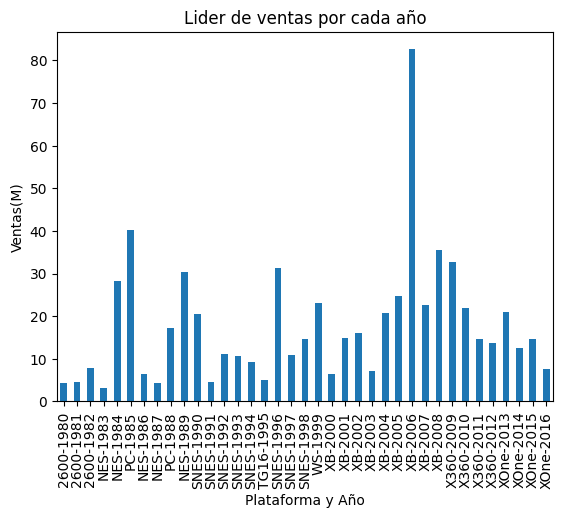

In [42]:


plataforma_año_1 = df_games_limpios.groupby(['year_of_release'])['platform','revenue'].max().reset_index()
plataforma_año_1['plat_año'] = plataforma_año_1['platform']+'-'+ ((plataforma_año_1['year_of_release']).astype(str))
plataforma_año_1.plot(x='plat_año', y='revenue', kind='bar',legend=False)
plt.title('Lider de ventas por cada año')
plt.ylabel('Ventas(M)')
plt.xlabel('Plataforma y Año')
plt.show()

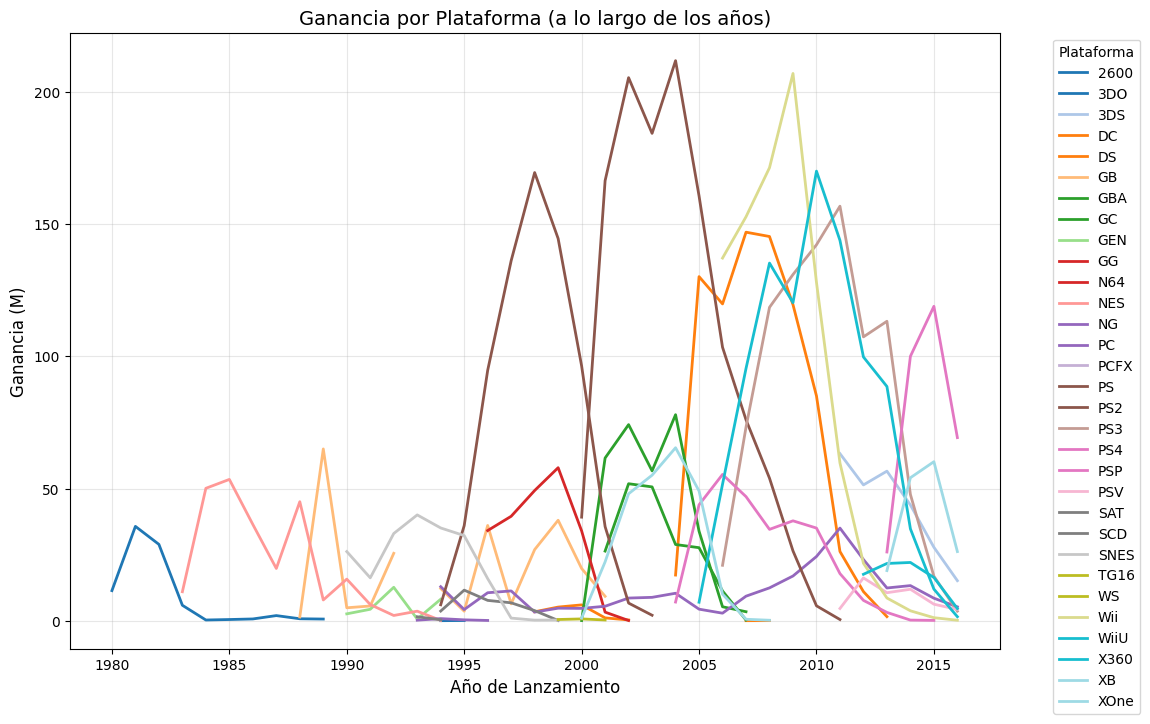

In [43]:
#df_ancho = df_largo.pivot(index='id', columns='variable', values='valor')

ganancia_año_1 = df_games_limpios.groupby(['year_of_release','platform'])['revenue'].sum().reset_index()

pivot_df = ganancia_año_1.pivot(index='year_of_release', 
                                columns='platform', 
                                values='revenue')
pivot_df.plot( kind='line',
             colormap='tab20',  # Paleta con 20 colores distintos
              linewidth=2,figsize=(12,8))
             # ax=plt.gca())
plt.title('Ganancia por Plataforma (a lo largo de los años)', fontsize=14)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ganancia (M)', fontsize=12)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Buena manera de mostrar los datos, gracias a la gráfica podemos observar el tiempo de vida de cada una de las plataformas
</div>


In [44]:
primera_venta = (
    df_games_limpios.groupby('platform')['year_of_release']
      .min()
      .reset_index(name='primera_venta')
)
#primera_venta

In [45]:
ultima_venta = (
    df_games_limpios.groupby('platform')['year_of_release']
      .max()
      .reset_index(name='ultima_venta')
)


In [46]:
en_mercado = primera_venta.merge(ultima_venta,on='platform')
en_mercado['años_de_ventas'] = en_mercado['ultima_venta'] - en_mercado['primera_venta']
mercado_organizado = en_mercado.sort_values(by='ultima_venta',ascending=False).reset_index().drop('index',axis=1)

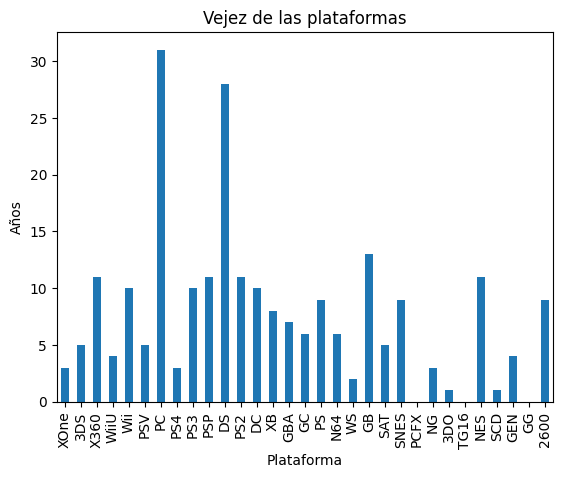

In [47]:
mercado_organizado.plot(x='platform',y='años_de_ventas', kind='bar',legend=False)
plt.title('Vejez de las plataformas')
plt.ylabel('Años')
plt.xlabel('Plataforma')
plt.show()

In [48]:
mercado_organizado['años_de_ventas'].mean()

7.612903225806452

In [49]:
mercado_organizado['años_de_ventas'].median()

6.0

In [50]:
mercado_organizado['años_de_ventas'].mode()[0]

11

Segun los calculos, las plataformas de videojuegos duran en promedio 7,61 años en el mercado antes de dejar de  vender juegos.
Las 10 ultimas plataformas mosytradas en el df "mercado_organizado", que esta organizado por el año de ultima venta, se evidencia que las 10 plataformas iniciaron antes del año 2000 y terminaron antes del año 2000.

Hay dos casos a denotar:
 1 - DS duro 28 años en el mercado pero acabo en el 2013
 2 - PC empezo en el año 1985 y aun tiene ventas de juegos.

Si solo nos guiasemos por los la media de vida o la mediana, puede que le quede poco tiempo a la plataforma y sea mejor pensar en otras alternativas, como por ejemplo, Xone, 3DS o WiiU. Sin embargo tambien se debe tener encuenta que si la plataforma de PC ha durando tanto tiempo es porque puede ofrecer mas estabilidad que las demas plataformas.

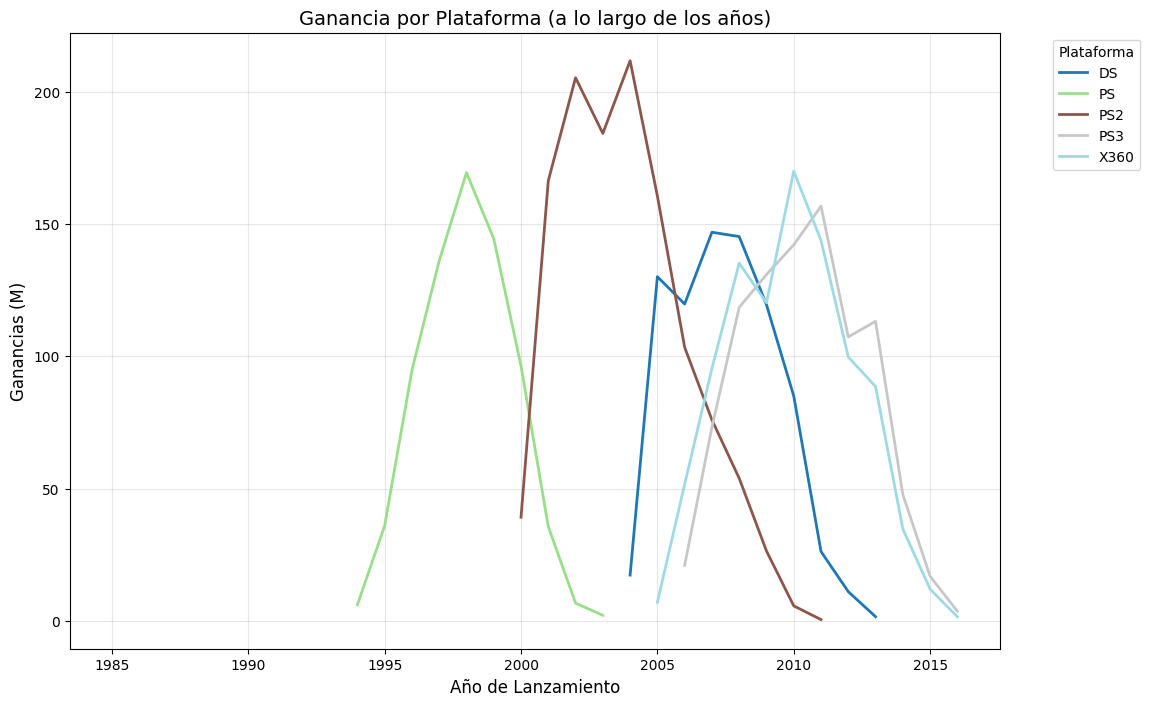

In [51]:
pivot_ventas = top_5.pivot(index='year_of_release', 
                                columns='platform', 
                                values='revenue')
pivot_ventas.plot( kind='line',
             colormap='tab20',  # Paleta con 20 colores distintos
              linewidth=2,figsize=(12,8))
             
plt.title('Ganancia por Plataforma (a lo largo de los años)', fontsize=14)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ganancias (M)', fontsize=12)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
#plt.tight_layout()
plt.show()
plt.show()

In [52]:

primera_venta_5 = top_5.groupby('platform')['year_of_release'].min().reset_index(name='primera_venta')
ultima_venta_5 =  top_5.groupby('platform')['year_of_release'].max().reset_index(name='ultima_venta')
comb_5 = primera_venta_5.merge(ultima_venta_5,on='platform')
comb_5['años_ventas'] = comb_5['ultima_venta'] - comb_5['primera_venta']
comb_5

,platform,primera_venta,ultima_venta,años_ventas
0,DS,1985,2013,28
1,PS,1994,2003,9
2,PS2,2000,2011,11
3,PS3,2006,2016,10
4,X360,2005,2016,11


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Buna manera de mostrar cuantos años han durado algunas de las plataformas, podemos ver que duran bastante tiempo en el mercado
</div>


### Modelo para 2017

Se seleccionaron las plataformas con mas ingresos mientras tenian juegos en el mercado. De las 5 elegidas solo dos esta aun (2016) en el mercado, las demas ya no tienen ventas.
Como dije anteriormente, estas dos plataformas, segun la media de vida de las plataformas, ya supero la media, entonces lo mas probable es que sea mejor apoyar a plataformas mas "jovenes", que aun tienen capacidad de crecimiento, las posibles plataformas, aunque la afirmacion es un poco precoz, serian: Xone, WiiU y 3DS; y de la misma manera si se quiere ser un poco conservador, se puede optar por PC, que, aunque no tiene el mayor numero de ventas ni numeros altos en juegos, es un mercado estable, almenos hasta que aparezca una plataforma que prometa mas.

## Plataformas lideres en ventas

Primero, aqui se va a trabajar con el df 'mercado_organizado', donde se escogeran las plataformas que tienen ventas aun hoy(2016). Luego se hara un estudio de las ganancias promedio por juego para averiguar cual es la plataforma con mayor relacion de juegos en venta y ganancias

In [54]:
ventas_hoy = mercado_organizado.query("ultima_venta == 2016")

In [55]:
historico_juegos = df_games_limpios.merge(ventas_hoy, on='platform')
#_1 = historico_juegos.query("revenue >= 1")
#_1m_ = _1m.groupby('platform')['revenue'].sum().reset_index(name='ganancias') 
#_1m_['cantidad_juegos'] = _1m.groupby('platform')['name'].count().reset_index()#(name='cantidad_juegos')

_pdg = historico_juegos.groupby('platform').agg({
    'revenue': 'sum',
    'name': 'count'
}).reset_index()

_pdg.columns = ['platform', 'ganancias', 'cantidad_juegos']
_pdg['promedio_ganancia'] = _pdg['ganancias'] / _pdg['cantidad_juegos']
_pdg.sort_values(by='promedio_ganancia',ascending=False)

,platform,ganancias,cantidad_juegos,promedio_ganancia
3,PS4,314.14,392,0.801378
7,X360,959.99,1231,0.779846
2,PS3,931.33,1305,0.713663
5,Wii,891.18,1286,0.692986
8,XOne,159.32,247,0.645020
6,WiiU,82.19,147,0.559116
0,3DS,257.81,512,0.503535
1,PC,255.68,956,0.267448
4,PSV,53.81,429,0.125431


Se evidencia que la plataforma 'mas eficiente' en cuanto a ganancia por juego en venta es PS4, le siguen: X360, PS3, Wii y XOne respectivamente. Mientras que Wii tiene 1286 juegos en venta tiene una ganancias totales de 891 millones; PS4 tiene 392 juegos en venta y ganancias totales de 314 millones.


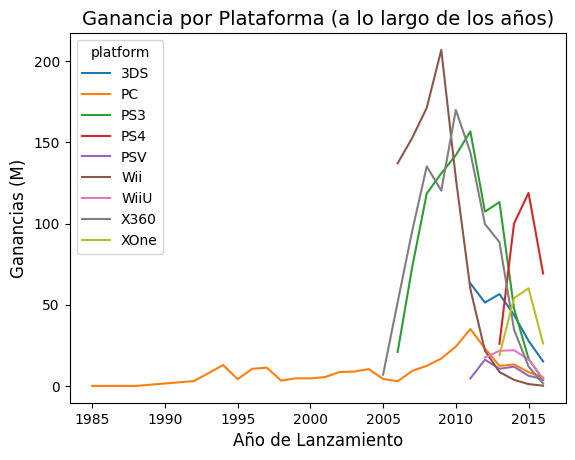

In [56]:
year_revenue = historico_juegos.groupby(['year_of_release','platform'])['revenue'].sum().reset_index()

hj = year_revenue.pivot(index='year_of_release', columns='platform', values='revenue')
hj.plot()
plt.title('Ganancia por Plataforma (a lo largo de los años)', fontsize=14)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ganancias (M)', fontsize=12)

plt.show()

In [57]:

#El objetivo de esta codigo es conseguir los picos de la grafica anterior, conocer cuales fueron sus puntos maximos de ventas antes de caer.
pico_ventas = historico_juegos.groupby(['platform'])['revenue'].max().sort_values(ascending=False).reset_index()
fecha_pico = pico_ventas.merge(historico_juegos, on=['revenue','platform'], how='left')
fecha_pico

,platform,revenue,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,primera_venta,ultima_venta,años_de_ventas
0,Wii,82.54,Wii Sports,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006,2016,10
1,X360,21.82,Kinect Adventures!,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,2005,2016,11
2,PS3,21.05,Grand Theft Auto V,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,2006,2016,10
3,PS4,14.63,Call of Duty: Black Ops 3,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,Rating unknown,2013,2016,3
4,3DS,14.60,Pokemon X/Pokemon Y,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,Rating unknown,2011,2016,5
5,PC,8.01,The Sims 3,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,1985,2016,31
6,XOne,7.39,Call of Duty: Black Ops 3,2015,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,Rating unknown,2013,2016,3
7,WiiU,7.09,Mario Kart 8,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,2012,2016,4
8,PSV,1.96,Minecraft,2014,Misc,0.18,0.64,0.90,0.24,0.0,0.0,Rating unknown,2011,2016,5


Como se puede evidenciar en las graficas y las tablas, las plataformas lideres en ventas no necesariamente tienen juegos a la venta en este momento, mas arriba explique que las lideres en ventas eran: DS,PS,PS2,PS3 y X360; dos de estas aun siguen en el mercado pero las otras no. Esas dos plataformas tambien se repiten mucho en los DF previamente mostrados. 

A dia de hoy (2016) aun hay 9 plataformas que tienen ventas, esas plataformas fueron filtradas y estudiadas, por ejemplo: la plataforma wii tuvo un inicio por lo alto  en 2005 y un continuo crecimiento hasta antes del 2010, pero para 2015 sus ventas cayeron casi a cero, por otro lado tenemos a PS4 que empezo en 2013 y en 2015 tuvo el juego con mayor ventas y aunque ha caido el mercado para un año despues, no se ve tan pronunciada la caida como la de Wii.

Garcias a el nacimiento de PS4 se ve una caida en las ventas de PS3 y esta propenso a dejar ventas en un tiempo cercano. Lo mismo ocurre con X360 y el nacimiento de XOne. Pero aun asi se ve mas prometedor PS4 que XOne. 

WiiU, 3DS, PSV Tienen casi los mismos valores para el año 2016. WiiU crecio poco, al igual que PSV, 3DS creio un poco mas pero a la final todos estan mas cerca de 'el final' de la plataforma que las otras dentro de los datos. 

PC se mantiene estable, hubo un crecimiento despues del 2010 pero volvio a ventas de antes del 2005 y se mantiene, parece ser la plataforma mas estable y conservadora del mercado desde que nacieron los videojuegos 

## Diagramas de caja

In [1]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=historico_juegos, x='platform', y='revenue')
plt.xticks(rotation=45)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma',  fontsize=12)
plt.ylabel('Ganancia', fontsize=12)
plt.yscale('log')
plt.show()

NameError: name 'plt' is not defined

En las plataformas con las que se han trabajado, se ve que el boxplot no se eleva mucho, sin embargo si hay muchos puntos que se salen de la media. Entre mas a la izquierda esta la plataforma mas se salen los puntos. Entre X360 y PS3 se disputa cual esta mas alto; pero el que les gana por mucho es el de Wii, hay una tendencia mucho mas alta de lo normal en las ventas de Wii.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

El diagrama de caja es una buena elección, nos muestra como en algunas plataformas las ventas estan consolidadas mientras que en otras consolas las ventas son muy disparejas lo que incrementa el rango intercuartil.

Recomiendo utilizar el parametro `plt.yscale('log')` para que las cajas se muestren de una mejor manera, te dejo el ejemplo en la celda de abajo
</div>


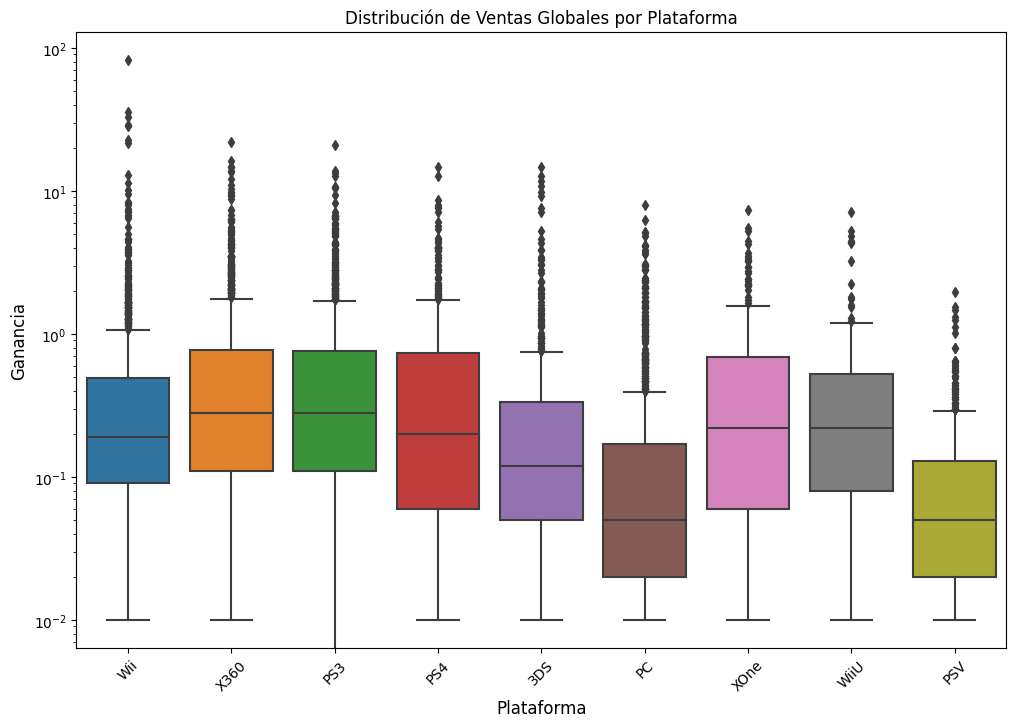

In [60]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=historico_juegos, x='platform', y='revenue')
plt.xticks(rotation=45)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma',  fontsize=12)
plt.ylabel('Ganancia', fontsize=12)
### ### ###
plt.yscale('log') # <- Nuevo parametro
### ### ###
plt.show()

## Reseñas de usuarios y afectación de la platamorma X360

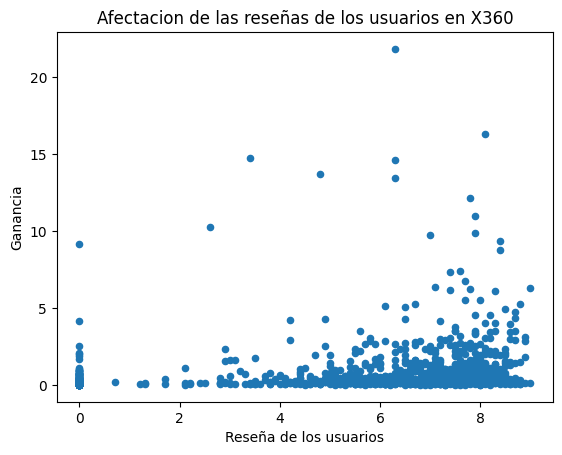

In [61]:
_x360 = historico_juegos.query("platform == 'X360'")
_x360.plot(x='user_score', y='revenue',kind='scatter')
plt.title('Afectacion de las reseñas de los usuarios en X360')
plt.ylabel('Ganancia')
plt.xlabel('Reseña de los usuarios')
plt.show()


In [62]:
_x360['revenue'].corr(_x360['user_score'])

0.2076580107920649

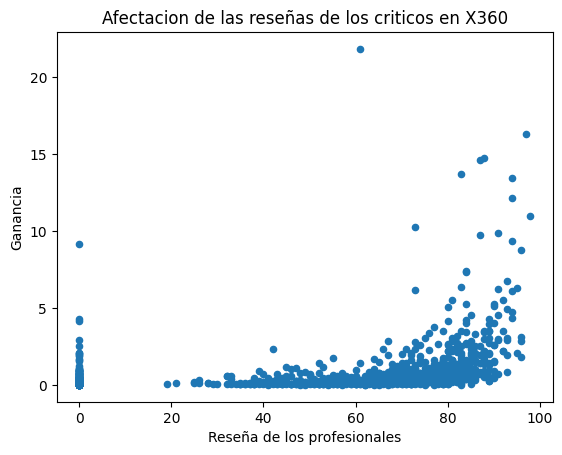

In [63]:
_x360 = historico_juegos.query("platform == 'X360'")
_x360.plot(x='critic_score', y='revenue',kind='scatter')
plt.title('Afectacion de las reseñas de los criticos en X360')
plt.ylabel('Ganancia')
plt.xlabel('Reseña de los profesionales')
plt.show()

In [65]:
_x360['revenue'].corr(_x360['critic_score'])

0.31165940291520666

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de mostrar la correlación entre las ventas y las reseñas, como bien mencionas la correlación es debil-moderada por lo que no siempre las buenas reseñas van a implicar un gran numero de ventas
</div>


### No se puede afirmar una correlacion entre las criticas y la venta de los juegos
Aunque se ven datos que puedan afirmar que gracias a una buena critica el juego tuvo mas ventas, los datos afirman que no es asi, el user_score brinda una correlacion de 0.11, es una correlacion muy baja; para critic_score es de 0.39, ya es un poco mayor, sin embargo sigue siendo baja para poder afirmar que la critica genera o disminuye las ventas de un juego

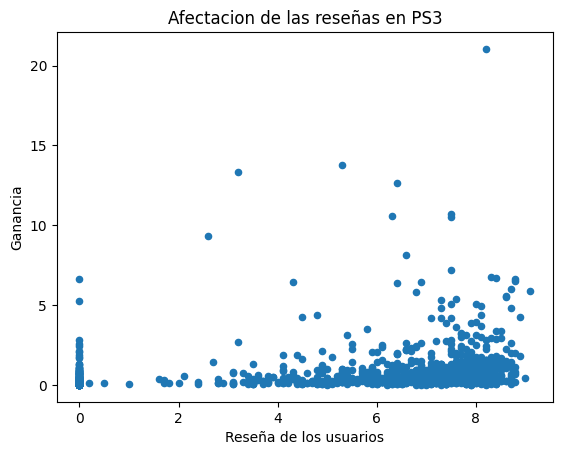

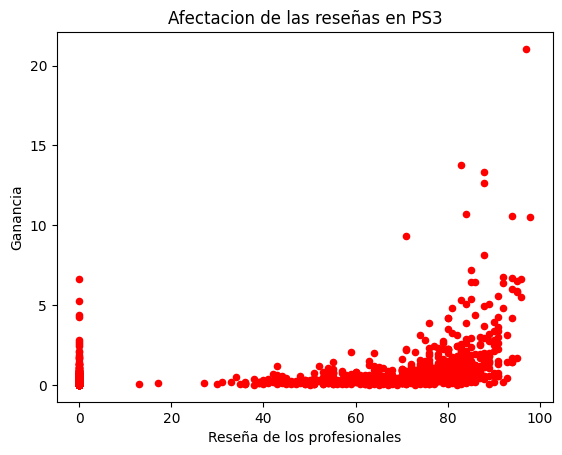

In [66]:
_ps3 = historico_juegos.query("platform == 'PS3'")
_ps3.plot(x='user_score', y='revenue',kind='scatter', xlabel='Reseña de los usuarios',title= 'Afectacion de las reseñas en PS3', ylabel='Ganancia')
_ps3.plot(x='critic_score', y='revenue',kind='scatter',color='red')
plt.title('Afectacion de las reseñas en PS3')
plt.ylabel('Ganancia')
plt.xlabel('Reseña de los profesionales')
plt.show()

In [67]:
_ps3['revenue'].corr(_ps3['user_score'])

0.27474053768233897

In [68]:
_ps3['revenue'].corr(_ps3['critic_score'])

0.3557675633246372

In [69]:
mix_compare = _x360.merge(_ps3, on='name')# para comparar los juegos que tienen en comun

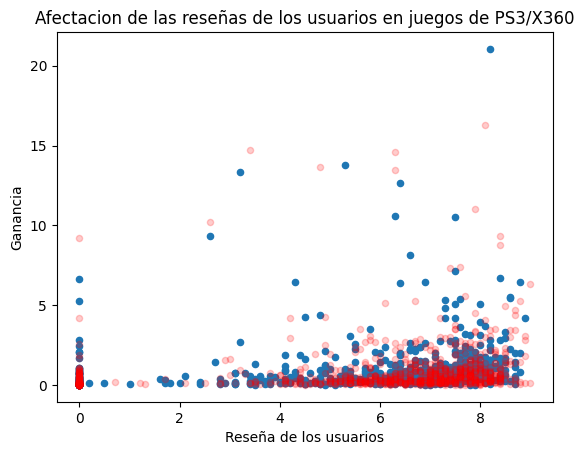

In [70]:


ax = mix_compare.plot(x='user_score_y', y='revenue_y',kind='scatter')
mix_compare.plot(x='user_score_x', y='revenue_x',kind='scatter',color='red',alpha = 0.2,ax=ax)
plt.title('Afectacion de las reseñas de los usuarios en juegos de PS3/X360')
plt.ylabel('Ganancia')
plt.xlabel('Reseña de los usuarios')
plt.show()


In [71]:
mix_compare['revenue_y'].corr(mix_compare['user_score_y']) # usuarios de PS3

0.19146605132309077

In [72]:
mix_compare['revenue_x'].corr(mix_compare['user_score_x']) # Usuarios de X360

0.17062230305560339

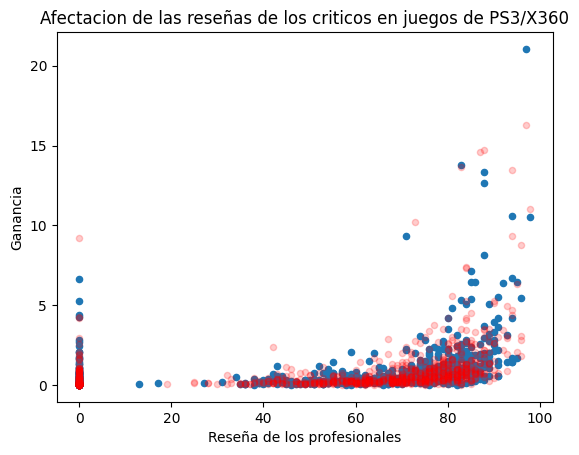

In [73]:
ax = mix_compare.plot(x='critic_score_y', y='revenue_y',kind='scatter')
mix_compare.plot(x='critic_score_x', y='revenue_x',kind='scatter',color='red',alpha = 0.2,ax=ax)
plt.title('Afectacion de las reseñas de los criticos en juegos de PS3/X360')
plt.ylabel('Ganancia')
plt.xlabel('Reseña de los profesionales')
plt.show()

In [74]:
mix_compare['revenue_y'].corr(mix_compare['critic_score_y']) # Criticos de PS3

0.2847316778716839

In [75]:
mix_compare['revenue_x'].corr(mix_compare['critic_score_x']) # Criticos de X360

0.2973239834590386

### Comparacion entre plataforma X360 y plataforma PS3
Especificamente escogi PS3 para hacer la comparativa porque es la plataforma mas 'pareja' con X360, o mas bien, es la compatencia directa con X360, pues ofrecen casi los mismos juegos, asi que realice un filtrado de los juegos que tenian en comun y finalmente ralice la comparacion y el calculo de los respectivos datos:

En la grafica se puede apreciar que en los mismos juegos tienen puntuaciones muy parecidas, en user_score es mas lejana que en critic_score, a primera vista se podria pensar que los usuarios de PS3 se guian un poco mas por la critica de los juegos para realizar la compra, pues la correlacion es de 0.11 mientras que la de X360 es de 0.09 lo cual si podria afectar las ventas, sin embargo, es muy bajo el numero como para afirmar que tienen correlacion, pero cuando revisamos los numeros de los critic_score, se denota una correlacion casi igual entre las dos plataformas por los mismos videojuegos, PS3 tiene una correlación de 0.418 y X360 tiene una correlación de 0.416, lo cual los deja en una correlacion media-baja. Por ende no se puede afirmar que la critica afecte en gran medida a las ventas.

A la final, los datos nos dejan como conclusión que hay una correlacion de reseñas de usuarios, reseñas profesionales  y las ventas de un videojuego es baja y  media-baja respectivamente.

### Generos mas rentables


In [76]:
ganancia_genero = historico_juegos.groupby('genre')['revenue'].sum().sort_values(ascending=False).reset_index()
ganancia_genero

,genre,revenue
0,Action,899.30
1,Shooter,697.50
2,Sports,664.14
3,Misc,398.45
4,Role-Playing,344.78
5,Racing,245.20
6,Platform,195.18
7,Fighting,142.49
8,Simulation,141.41
9,Adventure,82.75


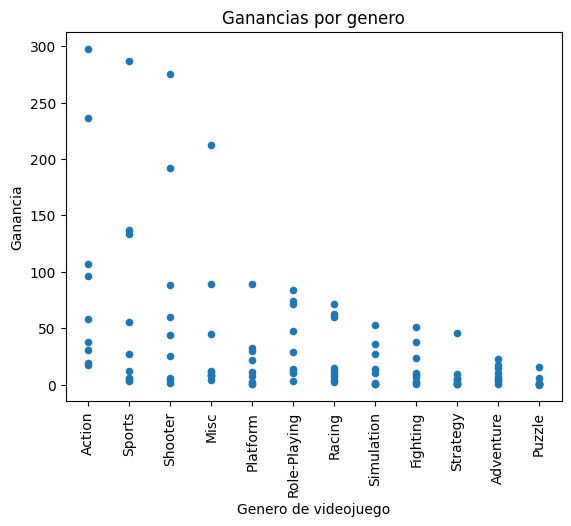

In [77]:

ganancia_genero_plt = historico_juegos.groupby(['platform','genre'])['revenue'].sum().sort_values(ascending=False).reset_index()
ganancia_genero_plt.plot(x='genre',y='revenue',kind='scatter')
plt.xticks(rotation=90)
plt.title('Ganancias por genero')
plt.ylabel('Ganancia')
plt.xlabel('Genero de videojuego')
plt.show()

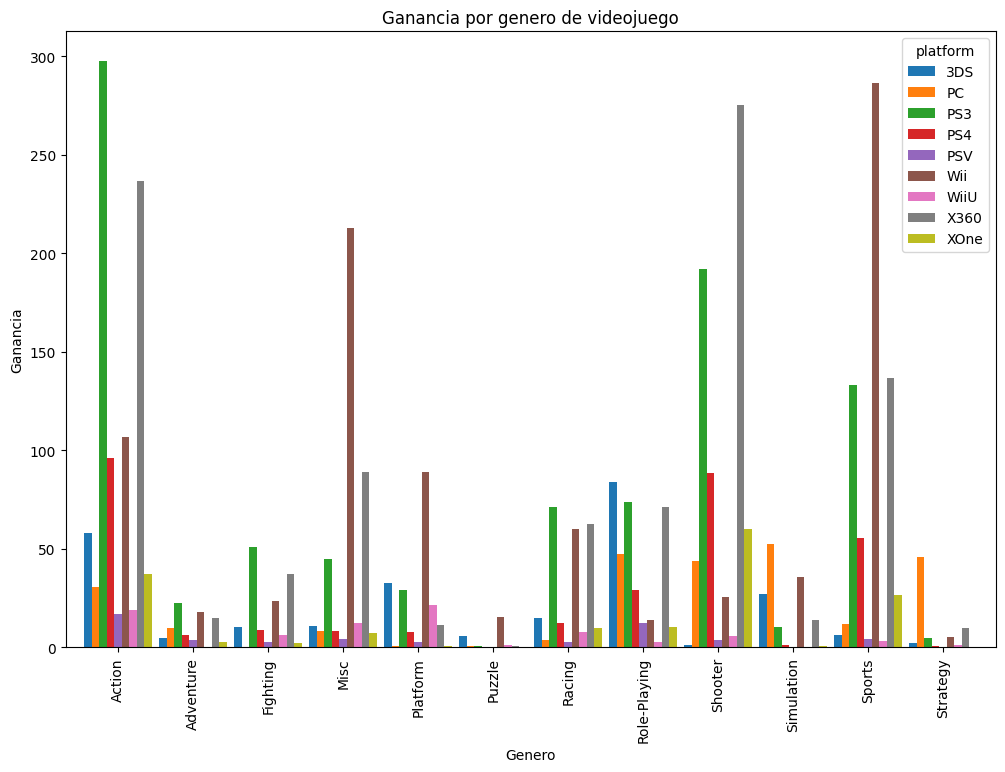

In [78]:
ghj = ganancia_genero_plt.pivot(index='genre', columns='platform', values='revenue')
ghj.plot(kind='bar', width=0.9,figsize=(12,8))
plt.title('Ganancia por genero de videojuego')
plt.ylabel('Ganancia')
plt.xlabel('Genero')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los géneros preferidos de las personas en distintas plataformas, las observaciones que haces me parecen buenas también
</div>


*¿Qué se puede decir de los géneros más rentables?*

Hay generos que llaman  mucho mas la atencion que otros. 'Puzle', 'Adventure' y 'strategy' lo compran muy poco; 'fighting' y 'simulation' lo compran mas que los anteriores 3 pero aun asi si los comparamos con los generos mas rentables sigue siendo numeros bajos. Los que mas se venden son el genero 'action', 'shooter' y 'sports'. 

*¿Puedes generalizar acerca de los géneros con ventas altas y bajas?*

No, no se pueden generalizar en los generos mas rentables porque hay plataformas con muchas ventads en un solo genero, lo cual pueden inflar los numeros en general. Por ejemplo esta el casi de el genero 'platform' el cual, en general,  tiene numeros bajos pero hay muchas compras en wii, lo cual hace que sus numeros se eleven; Tambien se puede ver en el genero 'misc', el cual tiene muchas ventas por parte de wii pero el resto tinde a ser bajos numeros. 
Aqui lo que habria que hacer es una segregacion de las plataformas y los generos que mas ingresos le generan a esa plataforma: por ejemplo, con X360 y PS3, el genero que mas ingresos le genera a esas dos plataformas son 'Action' y 'shooter', e incluso en esos dos  no con la misma proporcion, ya que en action PS3 tiene muchas mas ganancias que X360, pero en 'shooter', X360 tiene muchas mas ventas que PS3; lo mismo con el genero  'sports', aunque X360 y PS3 estan igualados, Wii los supera muy facilmente, casi doblando las ventas.

# Perfil de usuario para cada region
Tomando toda la informacion de loe juegos desde 1980 tenemos:

## Region NA

In [79]:


na_region_plat = df_games_limpios.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_region_plat.head()


,platform,na_sales
0,X360,594.74
1,PS2,572.92
2,Wii,486.87
3,PS3,390.13
4,DS,380.31


In [80]:
na_region_rat = df_games_limpios.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False).reset_index()
na_region_rat

,rating,na_sales
0,E,1274.24
1,Rating unknown,1225.84
2,T,746.60
3,M,742.89
4,E10+,345.50
5,K-A,2.56
6,EC,1.53
7,AO,1.26
8,RP,0.00


## Region EU

In [81]:
eu_region_plat = df_games_limpios.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(eu_region_plat.head())
eu_region_rat = df_games_limpios.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_region_rat

  platform  eu_sales
0      PS2    332.63
1      PS3    327.20
2     X360    268.19
3      Wii    258.32
4       PS    212.39


,rating,eu_sales
0,E,703.86
1,Rating unknown,609.65
2,M,480.00
3,T,421.60
4,E10+,183.35
5,AO,0.61
6,K-A,0.27
7,EC,0.11
8,RP,0.03


## Region JP 

In [82]:
jp_region_plat = df_games_limpios.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(jp_region_plat.head())
jp_region_rat = df_games_limpios.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_region_rat

  platform  jp_sales
0       DS    175.02
1       PS    139.78
2      PS2    137.54
3     SNES    116.55
4      3DS    100.62


,rating,jp_sales
0,Rating unknown,836.74
1,E,197.96
2,T,150.68
3,M,63.58
4,E10+,40.20
5,K-A,1.46
6,AO,0.00
7,EC,0.00
8,RP,0.00


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Las agrupaciones que muestras en los últimos ejercicios me parecen acertadas, podemos ver las diferencias entre las regiones.

Recomiendo hacer gráficas ue acompañen estas tablas, de esta manera podemos resaltar las diferencias entre las regiones
</div>


### Top 5 plataformas por cada region
- En NA: 'X360', 'PS2', 'Wii', 'PS3', 'DS'
- En EU: 'PS2' 'PS3' 'X360' 'Wii' 'PS'
- En JP: 'DS' 'PS' 'PS2' 'SNES' '3DS

Se evidencia que en Norte America lidera X360, en la Union Europea Lidera PS2 y en japon Lidera DS. De las cinco plataformas que lideran ventas, se ve mayor similitud entre norte america y europa que entre japon y los otros dos; mientras que NA y EU compartes tres plataformas en diferente orden, japon y norte america comparten solo dos.
Hay una plataforma que aparece en los tres lugares pero en diferente gerarquia y es  la palatforma PS2, la cual lidera en europa, es segunda en norte america y es tercera en japon.

### ¿ESRB afecta a las ventas de las regiones individuales?
Omitiendo los datos de 'Rating unknown'.
Se evidencia que las tres regiones comarten el 'top 5' de rating en ESRB. Las tres regiones tienen la clasificaion 'E', 'T', 'M' y 'E10+', sin embargo, en la region de la union europea la clasificaion 'M' va de segundas en vez de tercera como en las otras dos regiones; y el quinto lugar esta la clasificacion K-A en Norte america y Japon, pero en La region de la Union Europea este cambia por la clasificaion AO


# Prueba de hipotesis: 

## ¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas?

In [83]:
xone = historico_juegos.query("platform == 'XOne'")
pc = historico_juegos.query("platform == 'PC'")

In [84]:
var_x = np.var(xone['user_score'])
covar_x = np.cov(xone['user_score'])
std_x = np.std(xone['user_score'])
var_p = np.var(pc['user_score'])
covar_p = np.cov(pc['user_score'])
std_p = np.std(pc['user_score'])
print("La varianza de XOne es:",var_x)
print("La covarianza de XOne es:",covar_x)
print("La desviacion estandar de XOne es:",std_x)
print("La varianza de PC es:",var_p)
print("La covarianza de PC es", covar_p)
print("La desviacion estandar de PC es:",std_p)

La varianza de XOne es: 9.644061367994883
La covarianza de XOne es: 9.683264869490799
La desviacion estandar de XOne es: 3.105488909655754
La varianza de PC es: 10.166705447646224
La covarianza de PC es 10.177351212512866
La desviacion estandar de PC es: 3.1885271596218567


H0 = Las calificaciones promedio de los usuarios en XOns y PC son iguales

H1 = Las calificaciones promedio de los usuarios en XOns y PC son diferentes

In [85]:
results_1 = st.ttest_ind(xone['user_score'], pc['user_score'],equal_var=False )

alpha_1 = (1-0.95)

print('valor p:', results_1.pvalue) 

if (results_1.pvalue < alpha_1):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

# Al rechazar la hipotesis nula nos quedamos con la hipotesis alternativa, lo cual indica que que las calificaciones promedio son diferentes

valor p: 0.0006640787546741321
Rechazamos la hipótesis nula


In [87]:
from scipy import stats

In [88]:

t_stat, p_val = stats.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)

print("t =", t_stat, ", p =", p_val)

t = -3.431639260453048 , p = 0.0006640787546741321


Use el t student, o sea, el ttest porque hay muchos datos y al haber suficientes lanzamientos, el promedio de los resultados van a tener una distribución de gaus; use el de pruebas individuales porque los dos DF no tienen relacion directa. 

Indica que Xbox One tiene una media menor que PC.

## ¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?

In [89]:
action = historico_juegos.query("genre == 'Action'")
sports = historico_juegos.query("genre == 'Sports'")

In [90]:
var_a = np.var(action['user_score'])
covar_a = np.cov(action['user_score'])
std_a = np.std(action['user_score'])
var_s = np.var(sports['user_score'])
covar_s = np.cov(sports['user_score'])
std_s = np.std(sports['user_score'])
print("La varianza del genero de accion es:",var_a)
print("La covarianza del genero de accion es:",covar_a)
print("La desviacion estandar del genero de accion es:",std_a)
print("La varianza de del genero deportes es:",var_s)
print("La covarianza del genero deportes es", covar_s)
print("La desviacion estandar del genero deportes es:",std_s)

La varianza del genero de accion es: 12.036708580173709
La covarianza del genero de accion es: 12.043735263524653
La desviacion estandar del genero de accion es: 3.4693959964486196
La varianza de del genero deportes es: 10.9101472550483
La covarianza del genero deportes es 10.922745577513712
La desviacion estandar del genero deportes es: 3.3030512038187205


H0= Las calificacones promedio de los usuarios de los generos Accion y Deportes son iguales

H1= Las calificaciones promedio de los suarios de los generos Accion y Deportes son iguales

In [91]:
results_2 = st.ttest_ind(action['user_score'], sports['user_score'],equal_var=False )

alpha_2 = (1-0.95)

print('valor p:', results_2.pvalue) 

if (results_2.pvalue < alpha_2):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 2.346574620580004e-05
Rechazamos la hipótesis nula


In [92]:
t_stat_, p_val_ = stats.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print("t =", t_stat_, ", p =", p_val_)

t = 4.240092805906706 , p = 2.346574620580004e-05


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


Use el t student, o sea, el ttest porque hay muchos datos y al haber suficientes lanzamientos, el promedio de los resultados van a tener una distribución de gaus; use el de pruebas individuales porque los dos DF no tienen relacion directa. 
Indica que action tiene una media mayor que sports.


## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias me parecen buenas
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras, especialmente en la parte donde se comparan las distintas regiones del mundo
- Desarrollar un poco más las conclusiones finales, puedes añadir lo que te pareció complicado del proyecto, que mejoras se pueden hacer, etc.

</div>
